# Sioux Falls - User Equilibrium

## 1. Imports and data readin

First we load the paminco package and read the SiouxFalls data. 
The data was taken from [here](https://github.com/bstabler/TransportationNetworks) and converted to our format of choice: ``XML``.
The data for SiouxFalls comes with paminco and can be easily loaded: 

In [1]:
import paminco

sioux = paminco.load_sioux()

By default the edge cost equal the link travel time: $F_e = l_e$. 
The link travel time is defined as
\begin{equation*}
l_e(x_e) = \text{fft}_e \cdot \left( 1 + B_e \cdot \left(\frac{x}{\text{cap}_e}\right) ^ {p_e} \right)
\end{equation*}

## 2. Calculating the user equilibrium flow with Frank-Wolfe

Now we can use the Frank-Wolfe optimizer to find an approximate minimum cost flow that conincides <
with the user equilibrium. 
To achive this, we have to integrate the edge costs by:
\begin{equation*}
F_e = \int_0^{x_e} l_e(s) ds
\end{equation*}

In [2]:
sioux.integrate_cost()
fw = paminco.NetworkFW(sioux)
fw.run(max_iter=200)

The UE flow can be accessed by:

In [3]:
fw.flow

array([ 4498.7821898 ,  8117.75583672,  4520.88340381,  5963.65188895,
        8095.65462271, 14084.00507928, 10078.58349311, 14084.83959034,
       18072.9191857 ,  5258.05358314, 18090.17527662,  8796.49811731,
       15810.16485571,  5985.75310296,  8803.09435333, 12496.14271305,
       12097.35002505, 15812.90985099, 12524.84016309, 12044.54412394,
        6876.53002753,  8388.35577261, 15820.8247106 ,  6835.8533822 ,
       21763.45825439, 21833.44146396, 17730.87761062, 23166.83294579,
       11030.00071528,  8101.45295438,  5341.63200328, 17598.38932489,
        8387.48001807,  9767.8072575 , 10055.64776804,  8402.36644872,
       12369.45844555, 12461.40915112, 11113.02293883,  9804.01096126,
        9055.42242323,  8392.29443178, 23226.3295499 ,  9096.21013752,
       19096.4499822 , 18380.70377016,  8404.92396687, 11069.26778693,
       11664.75351574, 15305.66252567,  8105.1607739 , 11652.60888191,
        9953.27059451, 15865.7157521 , 15373.64242541, 19024.00140898,
      

## 3. Plotting with NetworkX

Now we use the plotting capabilities of network to plot the equilibrium flow.

First, we build a nx.DiGraph from out network:

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Get edgelist (pd.DataFrame) and pos dict
edgelist = sioux.get_flow_df(fw.flow)
pos = sioux.get_node_pos()

# Select only edge with flow
edgelist = edgelist[edgelist.flow > 0].reset_index()
G = nx.from_pandas_edgelist(
    edgelist,
    edge_attr=["flow"],
    create_using=nx.DiGraph(),
)

We setup a canves and plot the nodes (with labels) and the user equilibrium flow:

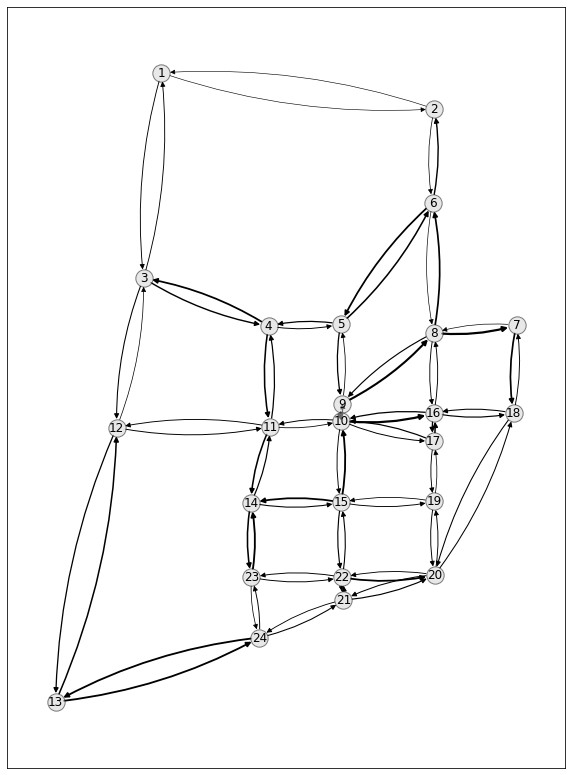

In [5]:
plt.figure(figsize=(10, 14))
nx.draw_networkx_nodes(G, pos, node_color="lightgrey", edgecolors="black", alpha=0.5)
nx.draw_networkx_edges(
    G, 
    pos, 
    width=2*edgelist.flow/edgelist.flow.max() + 0.2,
    connectionstyle="arc3, rad=0.1"
)
_  = nx.draw_networkx_labels(G, pos)